# What is popular in data science?
Since I'm passionate about data science, I decided to scour the internet in search for the answer to the question "What is it that people want to learn about in data science?"

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science! It employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable. Questions have tags and those are very useful in categorizing content.

So I decided to consult [Data Science Stack Exchange (DSSE)](https://datascience.stackexchange.com/) to see what kind of content is more popular in data science.

Stack Exchange provides a public data base for each of its websites- Stack Exchange Data Explorer (SEDE). Here are important links:

[to query](https://data.stackexchange.com/datascience/query/new)   
[help section](https://data.stackexchange.com/help)    
[tutorial](https://data.stackexchange.com/tutorial)   

Note: SEDE uses Transact-SQL — Microsoft's SQL


Tables of interest:    
Posts: Id, PostTypeId, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount   
PostTypes: Id, Name   

The posts table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:

|Column|Description|
|---|---|
|Id:| An identification number for the post.|
|PostTypeId:| An identification number for the type of post.|
|CreationDate:| The date and time of creation of the post.|
|Score:| The post's score.|
|ViewCount:| How many times the post was viewed.|
|Tags:| What tags were used.|
|AnswerCount:| How many answers the question got (only applicable to question posts).|
|FavoriteCount:| How many times the question was favored (only applicable to question posts).|

PostTypes table tell us what PostTypeId values refer to:

|Id|Name|
|---|---|
|1|Question|
|2|Answer|
|3|Wiki|
|4|TagWikiExcerpt|
|5|TagWiki|
|6|ModeratorNomination|
|7|WikiPlaceholder|
|8|PrivilegeWiki|

There are eight different types of posts. Before we try to figure out which of them are relevant to us, let's check how many of them there are:

|PostTypeId|Count|
|---|---|
|1|36404|
|2|42724|
|4|338|
|5|338|
|6|14|
|7|1|

Due to their low volume, anything that isn't questions or answers is mostly inconsequential. Even if it happens to be the case that such kind of posts is immensely popular, they would just be outliers and not relevant to us. We'll then just focus on the questions. Since we're only interested in recent posts, we'll limit our analysis to the posts from last one year, starting July, 2024.



Here is the query used to pull the data from SEDE:
``` 
SELECT Id, PostTypeId, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount
  FROM Posts
 WHERE PostTypeId = 1 AND CreationDate > '2024-07-01' 

```

The result of the query was stored in a file called ds_questions.csv. Let's look at the first few rows of the data we got:

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('ds_questions.csv')
df.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,129573,1,2024-07-01 01:20:37,1,142,<python><scikit-learn>,2,NaN
1,129579,1,2024-07-01 11:28:39,1,48,<nlp><r><llm><api>,0,NaN
2,129580,1,2024-07-01 15:46:05,0,37,<nlp><bert><huggingface><finetuning>,0,NaN
3,129582,1,2024-07-02 00:19:30,1,39,<python><classification>,0,NaN
4,129583,1,2024-07-02 03:02:14,0,49,<python><scikit-learn><cross-validation><grid-...,1,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1216 non-null   int64  
 1   PostTypeId     1216 non-null   int64  
 2   CreationDate   1216 non-null   object 
 3   Score          1216 non-null   int64  
 4   ViewCount      1216 non-null   int64  
 5   Tags           1216 non-null   object 
 6   AnswerCount    1216 non-null   int64  
 7   FavoriteCount  0 non-null      float64
dtypes: float64(1), int64(5), object(2)
memory usage: 76.1+ KB


FavouriteCount has no data, so we can drop that column. Let's also fix the data type of CreationDate column

In [4]:
df['CreationDate'] = pd.to_datetime(df['CreationDate'])
df.drop(columns='FavoriteCount', errors='ignore', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            1216 non-null   int64         
 1   PostTypeId    1216 non-null   int64         
 2   CreationDate  1216 non-null   datetime64[ns]
 3   Score         1216 non-null   int64         
 4   ViewCount     1216 non-null   int64         
 5   Tags          1216 non-null   object        
 6   AnswerCount   1216 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 66.6+ KB


The values in the Tags column are strings that look like this:

```
"<machine-learning><regression><linear-regression><regularization>"
```

We want to transform this string in something more suitable to use typical string methods. Let's transform strings like the above into something like:

```
"machine-learning,regression,linear-regression,regularization"
```

In [5]:
df['Tags'] = df['Tags'].str.replace(r'><', ',').str.replace(r'[<>]', '', regex=True)
df.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount
0,129573,1,2024-07-01 01:20:37,1,142,"python,scikit-learn",2
1,129579,1,2024-07-01 11:28:39,1,48,"nlp,r,llm,api",0
2,129580,1,2024-07-01 15:46:05,0,37,"nlp,bert,huggingface,finetuning",0
3,129582,1,2024-07-02 00:19:30,1,39,"python,classification",0
4,129583,1,2024-07-02 03:02:14,0,49,"python,scikit-learn,cross-validation,grid-sear...",1


Let's now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: 
1. for each tag we'll count how many times the tag was used, and 
2. how many times a question with that tag was viewed.

### Most used tags

In [6]:

tags = Counter()
df['Tags'].str.lower().str.split(',').apply(tags.update)
tag_count = pd.Series(dict(tags)).to_frame().reset_index()
tag_count.columns = ['tag', 'count']
most_used = tag_count.sort_values(by='count', ascending=False).reset_index(drop=True).head(20)
most_used

,tag,count
0,machine-learning,341
1,python,177
2,deep-learning,135
3,time-series,92
4,neural-network,88
5,classification,83
6,pytorch,75
7,dataset,74
8,regression,72
9,nlp,67


### Most viewed tags

In [7]:
def count_views(tag):
    df_tag = df.loc[df['Tags'].str.contains(tag)]
    view_count = df_tag['ViewCount'].astype(int).sum()
    return view_count

In [8]:
tag_count['views'] = tag_count['tag'].apply(count_views)
most_viewed = tag_count.sort_values(by='views', ascending=False).reset_index(drop=True).head(20)
most_viewed=most_viewed[['tag', 'views']]
most_viewed

,tag,views
0,r,86440
1,learning,35924
2,machine-learning,30128
3,python,16289
4,data,14069
5,deep-learning,11805
6,.net,11160
7,regression,10936
8,model,9777
9,neural-network,9327


### Most used but not most viewed

In [9]:
most_used.merge(most_viewed, how='left', on='tag')


,tag,count,views
0,machine-learning,341,30128.0
1,python,177,16289.0
2,deep-learning,135,11805.0
3,time-series,92,4939.0
4,neural-network,88,9327.0
5,classification,83,8999.0
6,pytorch,75,7031.0
7,dataset,74,NaN
8,regression,72,10936.0
9,nlp,67,NaN


The tags present in most_used and not present in most_viewed are:
dataset, nlp, transformer, tensorflow, keras, clustering, llm, predictive-modeling, data-science-model

### Most viewed but not most used

In [10]:
most_viewed.merge(most_used, how='left', on='tag')


,tag,views,count
0,r,86440,NaN
1,learning,35924,NaN
2,machine-learning,30128,341.0
3,python,16289,177.0
4,data,14069,50.0
5,deep-learning,11805,135.0
6,.net,11160,NaN
7,regression,10936,72.0
8,model,9777,NaN
9,neural-network,9327,88.0


The tags present in most_viewed but not in most_used are:
r, learning, .net, model, torch, ai, time, xgboost, optimization

### Most used and most viewed
The most used tags are also the most viewed. Here's a list of the tags in common:

In [11]:
most_used.merge(most_viewed, how='inner', on='tag')

,tag,count,views
0,machine-learning,341,30128
1,python,177,16289
2,deep-learning,135,11805
3,time-series,92,4939
4,neural-network,88,9327
5,classification,83,8999
6,pytorch,75,7031
7,regression,72,10936
8,scikit-learn,61,7694
9,data,50,14069


Top3 most used tags which are also most viewed: machine-learning, python and deep-learning. Let's explore the evolution of interest in machine-learning and deep-learning over time.

### Interest in deep-learning and machine-learning over time

In order to track the interest in deep learning and machine-learning across time, we will:

- Count how many deep learning and machine learning questions are asked per time period.
- Count the total amount of questions per time period.
- Find how many deep learning and machine learning questions there are relative to the total amount of questions per time period.

Following query fetches all of the questions ever asked on DSSE, their dates and tags:

```
SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
```
Results are saved in all_questions.csv

In [12]:
df_all = pd.read_csv('all_questions.csv')
df_all.head()

,Id,CreationDate,Tags
0,88525,2021-01-26 22:49:22,<predictive-modeling><feature-scaling>
1,88527,2021-01-27 00:02:58,<machine-learning><similarity>
2,88530,2021-01-27 02:46:43,<random-forest><decision-trees><xgboost><linea...
3,88531,2021-01-27 05:20:56,<python><time-series><matplotlib>
4,88532,2021-01-27 06:15:32,<machine-learning><deep-learning>


In [13]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36404 entries, 0 to 36403
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            36404 non-null  int64 
 1   CreationDate  36404 non-null  object
 2   Tags          36404 non-null  object
dtypes: int64(1), object(2)
memory usage: 853.3+ KB


In [14]:
# Converting CreationDate to datetime type
df_all['CreationDate'] = pd.to_datetime(df_all['CreationDate'])

# formatting the content of Tags columns to a comma separated list

df_all['Tags'] = df_all['Tags'].str.replace(r'><', ',').str.replace(r'[<>]', '', regex=True)
df_all.head()

,Id,CreationDate,Tags
0,88525,2021-01-26 22:49:22,"predictive-modeling,feature-scaling"
1,88527,2021-01-27 00:02:58,"machine-learning,similarity"
2,88530,2021-01-27 02:46:43,"random-forest,decision-trees,xgboost,linear-al..."
3,88531,2021-01-27 05:20:56,"python,time-series,matplotlib"
4,88532,2021-01-27 06:15:32,"machine-learning,deep-learning"


In [15]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36404 entries, 0 to 36403
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            36404 non-null  int64         
 1   CreationDate  36404 non-null  datetime64[ns]
 2   Tags          36404 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 853.3+ KB


In [16]:
df_all['deep-learning'] = df_all['Tags'].apply(lambda x: True if 'deep-learning' in x else False)
df_all['machine-learning'] = df_all['Tags'].apply(lambda x: True if 'machine-learning' in x else False)
df_all.head()

,Id,CreationDate,Tags,deep-learning,machine-learning
0,88525,2021-01-26 22:49:22,"predictive-modeling,feature-scaling",False,False
1,88527,2021-01-27 00:02:58,"machine-learning,similarity",False,True
2,88530,2021-01-27 02:46:43,"random-forest,decision-trees,xgboost,linear-al...",False,False
3,88531,2021-01-27 05:20:56,"python,time-series,matplotlib",False,False
4,88532,2021-01-27 06:15:32,"machine-learning,deep-learning",True,True


Let resample the data to get quarterly analysis.

In [17]:
df_per_quarter = df_all.resample('QE', on='CreationDate').agg(
    total_questions=pd.NamedAgg(column="Tags", aggfunc="count"),
    deep_learning_questions=pd.NamedAgg(column="deep-learning", aggfunc="sum"),
    machine_learning_questions=pd.NamedAgg(column="machine-learning", aggfunc="sum")
)

df_per_quarter.head()

,total_questions,deep_learning_questions,machine_learning_questions
CreationDate,,,
2014-06-30,157,1,41
2014-09-30,188,1,61
2014-12-31,214,6,69
2015-03-31,188,3,65
2015-06-30,284,7,97


In [18]:
# How many deep learning questions and machine learning there are relative to the total amount of questions per time period

df_per_quarter['deep_learning_percent'] = df_per_quarter['deep_learning_questions']*100/df_per_quarter['total_questions']
df_per_quarter['machine_learning_percent'] = df_per_quarter['machine_learning_questions']*100/df_per_quarter['total_questions']
df_per_quarter.head()

,total_questions,deep_learning_questions,machine_learning_questions,deep_learning_percent,machine_learning_percent
CreationDate,,,,,
2014-06-30,157,1,41,0.636943,26.114650
2014-09-30,188,1,61,0.531915,32.446809
2014-12-31,214,6,69,2.803738,32.242991
2015-03-31,188,3,65,1.595745,34.574468
2015-06-30,284,7,97,2.464789,34.154930


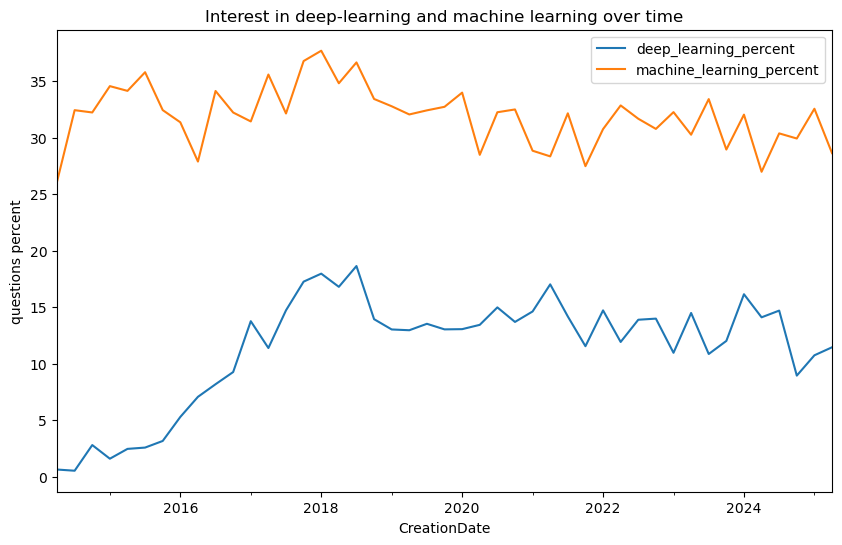

In [21]:
plt.figure(figsize=(10,6))
df_per_quarter['deep_learning_percent'][:-1].plot() #dropping the last quarter because it is not complete yet
df_per_quarter['machine_learning_percent'][:-1].plot()
plt.legend()
plt.ylabel('questions percent')
plt.title('Interest in deep-learning and machine learning over time')
plt.show()

Deep learning is a specialized subset of machine learning (ML), which itself is a branch of artificial intelligence (AI).
While both deep learning and ML enable systems to learn from data and make predictions, they differ significantly in their approach, requirements, and capabilities.  Deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification, regression, and representation learning. 

Data shows a spike in interest in deep learning around 2018 and after the initial spike, the interest has been relatively steady. 


### Relations between tags

In [20]:
ml_dl = df_all[df_all["Tags"].apply(
    lambda tags: True if "machine-learning" in tags and "deep-learning" in tags else False)
]
ml_dl_count = ml_dl.shape[0]
ml_count = df_all['machine-learning'].sum()
dl_count = df_all['deep-learning'].sum()

# How many questions are tagged both ml and dl out of all ml tags
dl_ml_realtion = ml_dl_count*100/ml_count
dl_ml_realtion

17.498506953331628

About 17.5% of ML questions are also tagged as DL questions. This relation is not surprising given that DL is a sub-field of ML.

# Conclusion
In my quest to find out "What is it that people want to learn about in data science?", I found that top three topics are:
1. machine-learning
2. python
3. deep-learning

Data shows a spike in interest in deep learning around 2018. After some research, I found that it was driven by a confluence of factors that had been building for over a decade. A key catalyst was the dramatic improvement in performance demonstrated by deep learning models in critical tasks like image recognition, speech recognition, and natural language processing, which began to surpass human-level performance in specific domains. 

This success was made possible by:
- The availability of massive datasets, which provided the necessary training material for complex neural networks.
- The rapid advancement in hardware, particularly the use of graphics processing units (GPUs) and specialized accelerators like tensor processing units (TPUs), provided the computational power required to train these large-scale models efficiently.
- The development and widespread adoption of powerful, user-friendly open-source software frameworks such as TensorFlow and PyTorch, built primarily in Python, significantly lowered the barrier to entry for researchers and developers, fostering a vibrant community of innovation.
- Furthermore, the proliferation of cloud computing platforms enabled organizations of all sizes to access the necessary infrastructure for training and deploying deep learning models without significant upfront investment.


It looks like deep-learning is here to stay and not just a fad, despite periodic concerns about hype and overuse. The technology has demonstrated significant, real-world success in specific domains like image and voice recognition, where it leverages large datasets to achieve superior performance.


### Author
Puneet Pawar